In [1]:
from __future__ import print_function
%matplotlib inline

In [ ]:
# install
!pip install ipywidgets
!pip isntall nilearn

In [2]:
!pip install --upgrade --force-reinstall ipywidgets
!pip install --upgrade --force-reinstall widgetsnbextension
!jupyter nbextension install --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-7.5.1-py2.py3-none-any.whl (121 kB)
  Using cached traitlets-4.3.3-py2.py3-none-any.whl (75 kB)
  Using cached nbformat-5.0.7-py3-none-any.whl (170 kB)
  Using cached ipython-7.16.1-py3-none-any.whl (785 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Using cached ipykernel-5.3.2-py3-none-any.whl (120 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached jupyter_core-4.6.3-py2.py3-none-any.whl (83 kB)
  Using cached setuptools-49.2.0-py3-none-any.whl (789 kB)
  Using cached pickleshare-0.7.5-py2.py3-none-any.whl (6.9 kB)
  Using cached pexpect-4.8.0-py2.py3-none-any.whl (59 kB)
  Using cached Pygments-2.6.1-py3-none-any.whl (914 kB)
  Using cached bac

  Attempting uninstall: ipython
    Found existing installation: ipython 7.16.1
    Uninstalling ipython-7.16.1:
      Successfully uninstalled ipython-7.16.1
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
  Attempting uninstall: terminado
    Found existing installation: terminado 0.8.3
    Uninstalling terminado-0.8.3:
      Successfully uninstalled terminado-0.8.3
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 19.0.1
    Uninstalling pyzmq-19.0.1:
      Successfully uninstalled pyzmq-19.0.1
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.6
    Uninstalling jupyter-client-6.1.6:
      Successfully uninstalled jupyter-client-6.1.

In [2]:
import nibabel as nib
from torchio.transforms import (
    RandomFlip,
    RandomAffine,
    RandomElasticDeformation,
    RandomNoise,
    RandomMotion,
    RandomBlur,
    RandomSpike,
    RandomBiasField,
    RandomGhosting,
    RescaleIntensity,
    Resample,
    ToCanonical,
    ZNormalization,
    CropOrPad,
    HistogramStandardization,
    OneOf,
    Pad,
    Compose,
)
import numpy as np
import torchio
import torch
import importlib
from nilearn import plotting
from pathlib import Path
import SimpleITK as sitk
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import ipywidgets as widgets

If you use TorchIO for your research, please cite the following paper:
Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning. Link: https://arxiv.org/abs/2003.04696



In [2]:
img_1 = "./ADNI_032_S_0677_MR_MPR____N3__Scaled_2_Br_20081003103356239_S35508_I119104.nii"
img_2 = "./CC0332_ge_3_53_F.nii.gz"

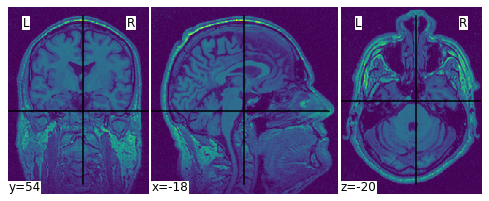

In [3]:
plotting.plot_img(img_1)

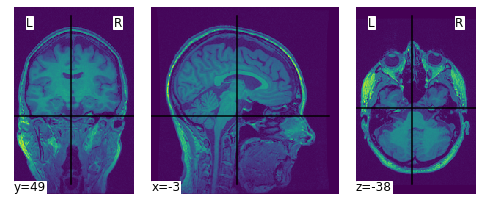

In [4]:
plotting.plot_img(img_2)

In [4]:
imgs = ["./ADNI_032_S_0677_MR_MPR____N3__Scaled_2_Br_20081003103356239_S35508_I119104.nii", 
         "./CC0332_ge_3_53_F.nii.gz"]

In [5]:
def getArgs():
    return ()

def getKwargs():
    return {}

def getTransform(kwargs):
    print(f"transform name: {name}")
    klass = getattr(importlib.import_module('torchio'), name)
    args = getArgs()
    kwargs = getKwargs()
    return klass(*args, **kwargs)

def plot(*args, **kwargs):
    print("starting to processing...")
    image = sitk.ReadImage(imgs[0])
    data, affine = torchio.utils.sitk_to_nib(image)
    tensor = torch.from_numpy(data.astype(np.float32))
    subject = torchio.Subject(img=torchio.Image(tensor=tensor, affine=affine))
    dataset = torchio.ImagesDataset([subject], transform=getTransform(kwargs))
    transformed = dataset[0]
    tensor = transformed['img'][torchio.DATA]
    affine = transformed['img'][torchio.AFFINE]
    img = nib.Nifti1Image(tensor[0].numpy(), affine)
    img.header['dim'][1] = 1
    nib.save(img, f"./tmp.nii.gz")
    plotting.plot_img("./tmp.nii.gz")
    print("Finished!")

## RandomAffine

In [27]:
name = "RandomAffine"

In [28]:
# Tuple (a,b) defining the scaling magnitude.
scales_widget = FloatSlider(min=0.5, max=2.0, step=0.01, value=2.0)
# Tuple (a,b) defining the rotation range in degrees.
degrees_widget = FloatSlider(min=-180, max=180, step=1, value=100.0)
# defining the translation in mm
translation_widget = FloatSlider(min=-50, max=50, step=0.5, value=30)
# interpolate intensity values during resampling
interpolationComboBox = widgets.Combobox(options=['nearest', 'linear'])

interactive(plot, scales=scales_widget, degrees=degrees_widget, 
            translation=translation_widget, image_interpolation=interpolationComboBox)

interactive(children=(FloatSlider(value=2.0, description='scales', max=2.0, min=0.5, step=0.01), FloatSlider(v…

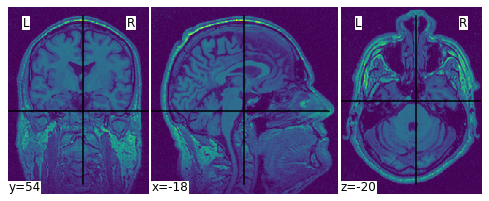

In [9]:
plotting.plot_img(img_1)

## RandomElasticDeformation

In [10]:
name = "RandomElasticDeformation"

In [11]:
# Number of control points along each dimension
num_control_points_widget = IntSlider(min=4, max=16, step=1, value=4)
# Tuple (a,b) defining the rotation range in degrees.
max_displacement_widget = FloatSlider(min=0, max=50, step=1, value=25)

interactive(plot, num_control_points=num_control_points_widget, 
            max_displacement=max_displacement_widget)

interactive(children=(IntSlider(value=4, description='num_control_points', max=16, min=4), FloatSlider(value=2…

## RandomNoise

transform name: ZNormalization


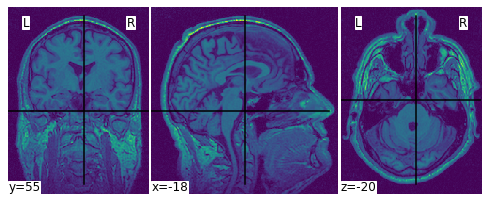

In [12]:
name = "ZNormalization"
image = sitk.ReadImage(imgs[0])
data, affine = torchio.utils.sitk_to_nib(image)
tensor = torch.from_numpy(data.astype(np.float32))
subject = torchio.Subject(img=torchio.Image(tensor=tensor, affine=affine))
dataset = torchio.ImagesDataset([subject], transform=getTransform({'masking_method': ZNormalization.mean}))
transformed = dataset[0]
tensor = transformed['img'][torchio.DATA]
affine = transformed['img'][torchio.AFFINE]
img = nib.Nifti1Image(tensor[0].numpy(), affine)
img.header['dim'][1] = 1
nib.save(img, f"./ZNormalization.nii.gz")
plotting.plot_img("./ZNormalization.nii.gz")

In [13]:
def plot_RandomNoise(*args, **kwargs):
    print("starting to processing...")
    image = sitk.ReadImage("./ZNormalization.nii.gz")
    data, affine = torchio.utils.sitk_to_nib(image)
    tensor = torch.from_numpy(data.astype(np.float32))
    subject = torchio.Subject(img=torchio.Image(tensor=tensor, affine=affine))
    dataset = torchio.ImagesDataset([subject], transform=getTransform(kwargs))
    transformed = dataset[0]
    tensor = transformed['img'][torchio.DATA]
    affine = transformed['img'][torchio.AFFINE]
    img = nib.Nifti1Image(tensor[0].numpy(), affine)
    img.header['dim'][1] = 1
    nib.save(img, f"./tmp.nii.gz")
    plotting.plot_img("./tmp.nii.gz")
    print("Finished!")

In [29]:
# It is often used after ^torchio.transforms.ZNormalization, 
# because its output has zero-mean.
name = "RandomNoise"

In [30]:
# Number of control points along each dimension
mean_widget = IntSlider(min=0, max=255, step=1, value=150)
# Tuple (a,b) defining the rotation range in degrees.
std_widget = FloatSlider(min=0, max=1, step=0.01, value=0.25)

interactive(plot_RandomNoise, mean=mean_widget,
           std=std_widget)

interactive(children=(IntSlider(value=150, description='mean', max=255), FloatSlider(value=0.25, description='…

## RandomMotion

In [16]:
name = "RandomMotion"

In [17]:
# Tuple (a,b) defining the rotation range in degrees.
degrees_widget = FloatSlider(min=-180, max=180, step=1, value=20.0)
# defining the translation in mm
translation_widget = FloatSlider(min=-50, max=50, step=0.5, value=4)
# interpolate intensity values during resampling
num_transforms_widget = IntSlider(min=0, max=10, step=1, value=2)

interactive(plot, degrees=degrees_widget, 
            translation=translation_widget, 
            num_transforms=num_transforms_widget)

interactive(children=(FloatSlider(value=20.0, description='degrees', max=180.0, min=-180.0, step=1.0), FloatSl…

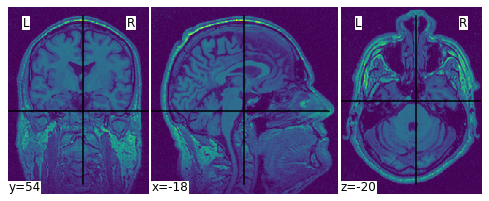

In [18]:
plotting.plot_img(img_1)

## RandomBlur

In [6]:
name = "RandomBlur"

In [7]:
# Tuple (a,b) defining the rotation range in degrees.
std_widget = FloatSlider(min=0, max=255, step=1, value=10.0)

interactive(plot,
           std=std_widget)

interactive(children=(FloatSlider(value=10.0, description='std', max=255.0, step=1.0), Output()), _dom_classes…

## RandomSpike

In [21]:
name = "RandomSpike"

In [22]:
# Number of spikes n presnet in k-space
num_spikes_widget = IntSlider(min=0, max=10, step=1, value=2)
# atio r between the spike intensity and the maximum of the spectrum
intensity_widget = FloatSlider(min=1, max=3, step=0.01, value=2)

interactive(plot,
           num_spikes=num_spikes_widget,
           intensity=intensity_widget)

interactive(children=(IntSlider(value=2, description='num_spikes', max=10), FloatSlider(value=2.0, description…

## RandomBiasField

In [23]:
name = "RandomBiasField"

In [24]:
# agnitude n of polynomial coefficients
coefficients_widget = FloatSlider(min=0, max=1, step=0.01, value=0.7)
# atio r between the spike intensity and the maximum of the spectrum
order_widget = IntSlider(min=0, max=5, step=1, value=4)

interactive(plot,
           coefficients=coefficients_widget,
           order=order_widget)

interactive(children=(FloatSlider(value=0.7, description='coefficients', max=1.0, step=0.01), IntSlider(value=…

## RandomGhosting

In [25]:
name = "RandomGhosting"

In [26]:
# Number of ‘ghosts’ n in the image
num_ghosts_widget = IntSlider(min=2, max=10, step=1, value=7)
# atio r between the spike intensity and the maximum of the spectrum
intensity_widget = FloatSlider(min=0.5, max=1, step=0.01, value=0.7)
# Number between 0 and 1 indicating how much of the k-space 
# center should be restored after removing the planes that generate 
# the artifact
restore_widget = FloatSlider(min=0, max=1, step=0.01, value=0.02)

interactive(plot,
           num_ghosts=num_ghosts_widget,
           intensity=intensity_widget, 
           restore=restore_widget)

interactive(children=(IntSlider(value=7, description='num_ghosts', max=10, min=2), FloatSlider(value=0.7, desc…